## TODO:
- 设计复用接口（interface）
    - `bash` interface? `python` interface?
- 一些ROI选取依赖于手动，如何智能自动选取？
- `Makefile` 制作
- 命名归一化
- 有必要面向对象吗？

[Ref of dipy in IVIM](https://docs.dipy.org/stable/examples_built/reconstruction/reconst_ivim.html#sphx-glr-examples-built-reconstruction-reconst-ivim-py)

$$ S(b) = S_0 (f e^{-bD^*} + (1-f)e^{-bD}) $$

In [1]:
import os
import numpy as np
import nibabel as nib
from matplotlib import pyplot as plt
from ipywidgets import interactive, fixed

In [2]:
# name依托于path
# screen_602_nii_name = '__WATER__BH_Ax_LAVA-FlexMASK_20230527154152_4.nii.gz'

nii_name = 'ST0_RTr_Ax_IVIM_Multi_b_9_20231110170922_15.nii.gz'

# unprocess path
zhaog_path = '/data/users/cyang/acute_pancreatitis/unprocess/nii/pantient/'

example_filename = os.path.join(zhaog_path, nii_name)
# aslice_comm_filename = os.path.join(zhaog_path, screen_602_nii_name)

img = nib.load(example_filename)
# screen_img = nib.load(aslice_comm_filename).get_fdata()

img_get = nib.load(example_filename).get_filename
img_get_fdata = img.get_fdata()
# %ls ../unprocess/nii/zhaoguang/ |grep 

In [3]:
%ls /data/users/cyang/acute_pancreatitis/unprocess/nii/pantient/

ST0_3-Pl_Loc_SSFSE_20231110170922_1_i00001.json
ST0_3-Pl_Loc_SSFSE_20231110170922_1_i00001.nii.gz
ST0_3-Pl_Loc_SSFSE_20231110170922_1_i00004.json
ST0_3-Pl_Loc_SSFSE_20231110170922_1_i00004.nii.gz
ST0_3-Pl_Loc_SSFSE_20231110170922_1_i00005.json
ST0_3-Pl_Loc_SSFSE_20231110170922_1_i00005.nii.gz
ST0_Apparent_Diffusion_Coefficient_(mm2_s)_20231110170922_1000.json
ST0_Apparent_Diffusion_Coefficient_(mm2_s)_20231110170922_1000.nii.gz
ST0_Apparent_Diffusion_Coefficient_(mm2_s)_20231110170922_1500.json
ST0_Apparent_Diffusion_Coefficient_(mm2_s)_20231110170922_1500.nii.gz
ST0_Apparent_Diffusion_Coefficient_(mm2_s)_20231110170922_400.json
ST0_Apparent_Diffusion_Coefficient_(mm2_s)_20231110170922_400.nii.gz
ST0_Apparent_Diffusion_Coefficient_(mm2_s)_20231110170922_500.json
ST0_Apparent_Diffusion_Coefficient_(mm2_s)_20231110170922_500.nii.gz
ST0_Apparent_Diffusion_Coefficient_(mm2_s)_20231110170922_900.json
ST0_Apparent_Diffusion_Coefficient_(mm2_s)_20231110170922_900.nii.gz
ST0_COL_RTr_Cor_fs_3D_

In [4]:
img.shape

(256, 256, 24, 10)

In [5]:
img_get()

'/data/users/cyang/acute_pancreatitis/unprocess/nii/pantient/ST0_RTr_Ax_IVIM_Multi_b_9_20231110170922_15.nii.gz'

In [6]:
header_img = img.header
header_img.get_xyzt_units()

('mm', 'sec')

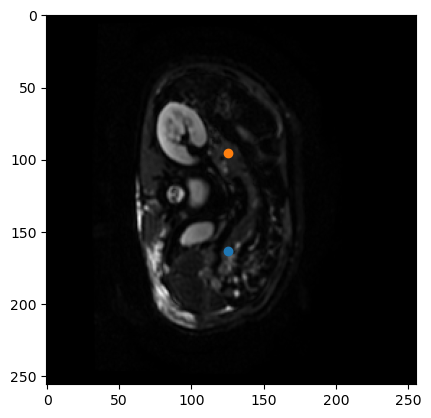

In [43]:
pancreas_slice = 8  # a slice to show pancreas
plt.imshow(img_get_fdata[:,:,pancreas_slice,1],'gray')
x_roi, y_roi = 125,163
plt.scatter(x_roi,y_roi)
x_roi, y_roi = 125, 95 
plt.scatter(x_roi,y_roi)

(array([[ 5.,  6.,  2.,  0.,  1.,  5.,  6.,  3.,  2.,  0.],
        [ 6.,  5.,  2.,  0.,  1.,  0.,  2.,  9.,  5.,  0.],
        [ 8.,  4.,  1.,  0.,  1.,  0.,  1.,  5., 10.,  0.],
        [ 7.,  5.,  1.,  0.,  1.,  0.,  1.,  4.,  9.,  2.],
        [ 6.,  6.,  0.,  1.,  1.,  0.,  1.,  7.,  8.,  0.],
        [ 7.,  5.,  0.,  1.,  1.,  0.,  6.,  4.,  6.,  0.],
        [ 8.,  2.,  3.,  0.,  1.,  1., 11.,  4.,  0.,  0.],
        [ 7.,  2.,  3.,  2.,  2.,  7.,  7.,  0.,  0.,  0.],
        [ 8.,  2.,  3.,  3.,  4., 10.,  0.,  0.,  0.,  0.],
        [10.,  4.,  1.,  4.,  9.,  2.,  0.,  0.,  0.,  0.],
        [ 9.,  6.,  2., 10.,  3.,  0.,  0.,  0.,  0.,  0.],
        [ 8.,  5.,  5., 10.,  2.,  0.,  0.,  0.,  0.,  0.],
        [ 8.,  6., 13.,  0.,  0.,  2.,  1.,  0.,  0.,  0.],
        [ 9., 15.,  1.,  3.,  2.,  0.,  0.,  0.,  0.,  0.],
        [22.,  6.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.],
        [24.,  3.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.],
        [19.,  8.,  0.,  1.,  0.,  2.,  

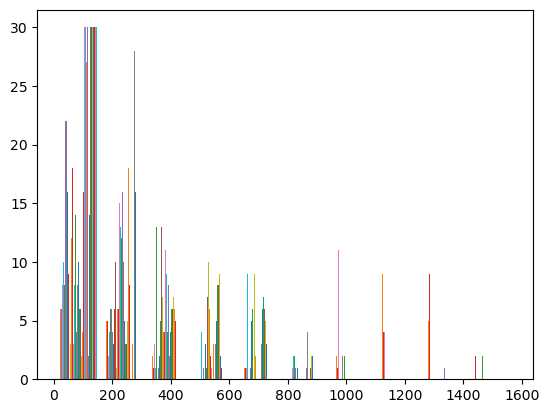

In [8]:
plt.hist(img_get_fdata[100:130,100:200,1,1])

Interactive to determine ROI

In [9]:
%matplotlib inline

def plot_img_nii(i_slice, i_bval,x_roi,y_roi):
    plt.imshow(img_get_fdata[:,:,i_slice,i_bval],'gray')
    plt.scatter(x_roi, y_roi)
    
    
interactive(plot_img_nii, 
            i_slice = (0,img_get_fdata.shape[2]-1),
            i_bval = (0,img_get_fdata.shape[3]-1),
            x_roi =(0,img_get_fdata.shape[0]-1),
            y_roi=(0,img_get_fdata.shape[1]-1))

interactive(children=(IntSlider(value=11, description='i_slice', max=23), IntSlider(value=4, description='i_bv…

In [45]:
num_bval = img_get_fdata.shape[3]
intensive_of_10b = np.zeros(num_bval)
for i_bval in range(img_get_fdata.shape[3]):
    print(i_bval)
    intensive_of_10b[i_bval] = img_get_fdata[116,186,15,i_bval]

0
1
2
3
4
5
6
7
8
9


(256, 256, 10)

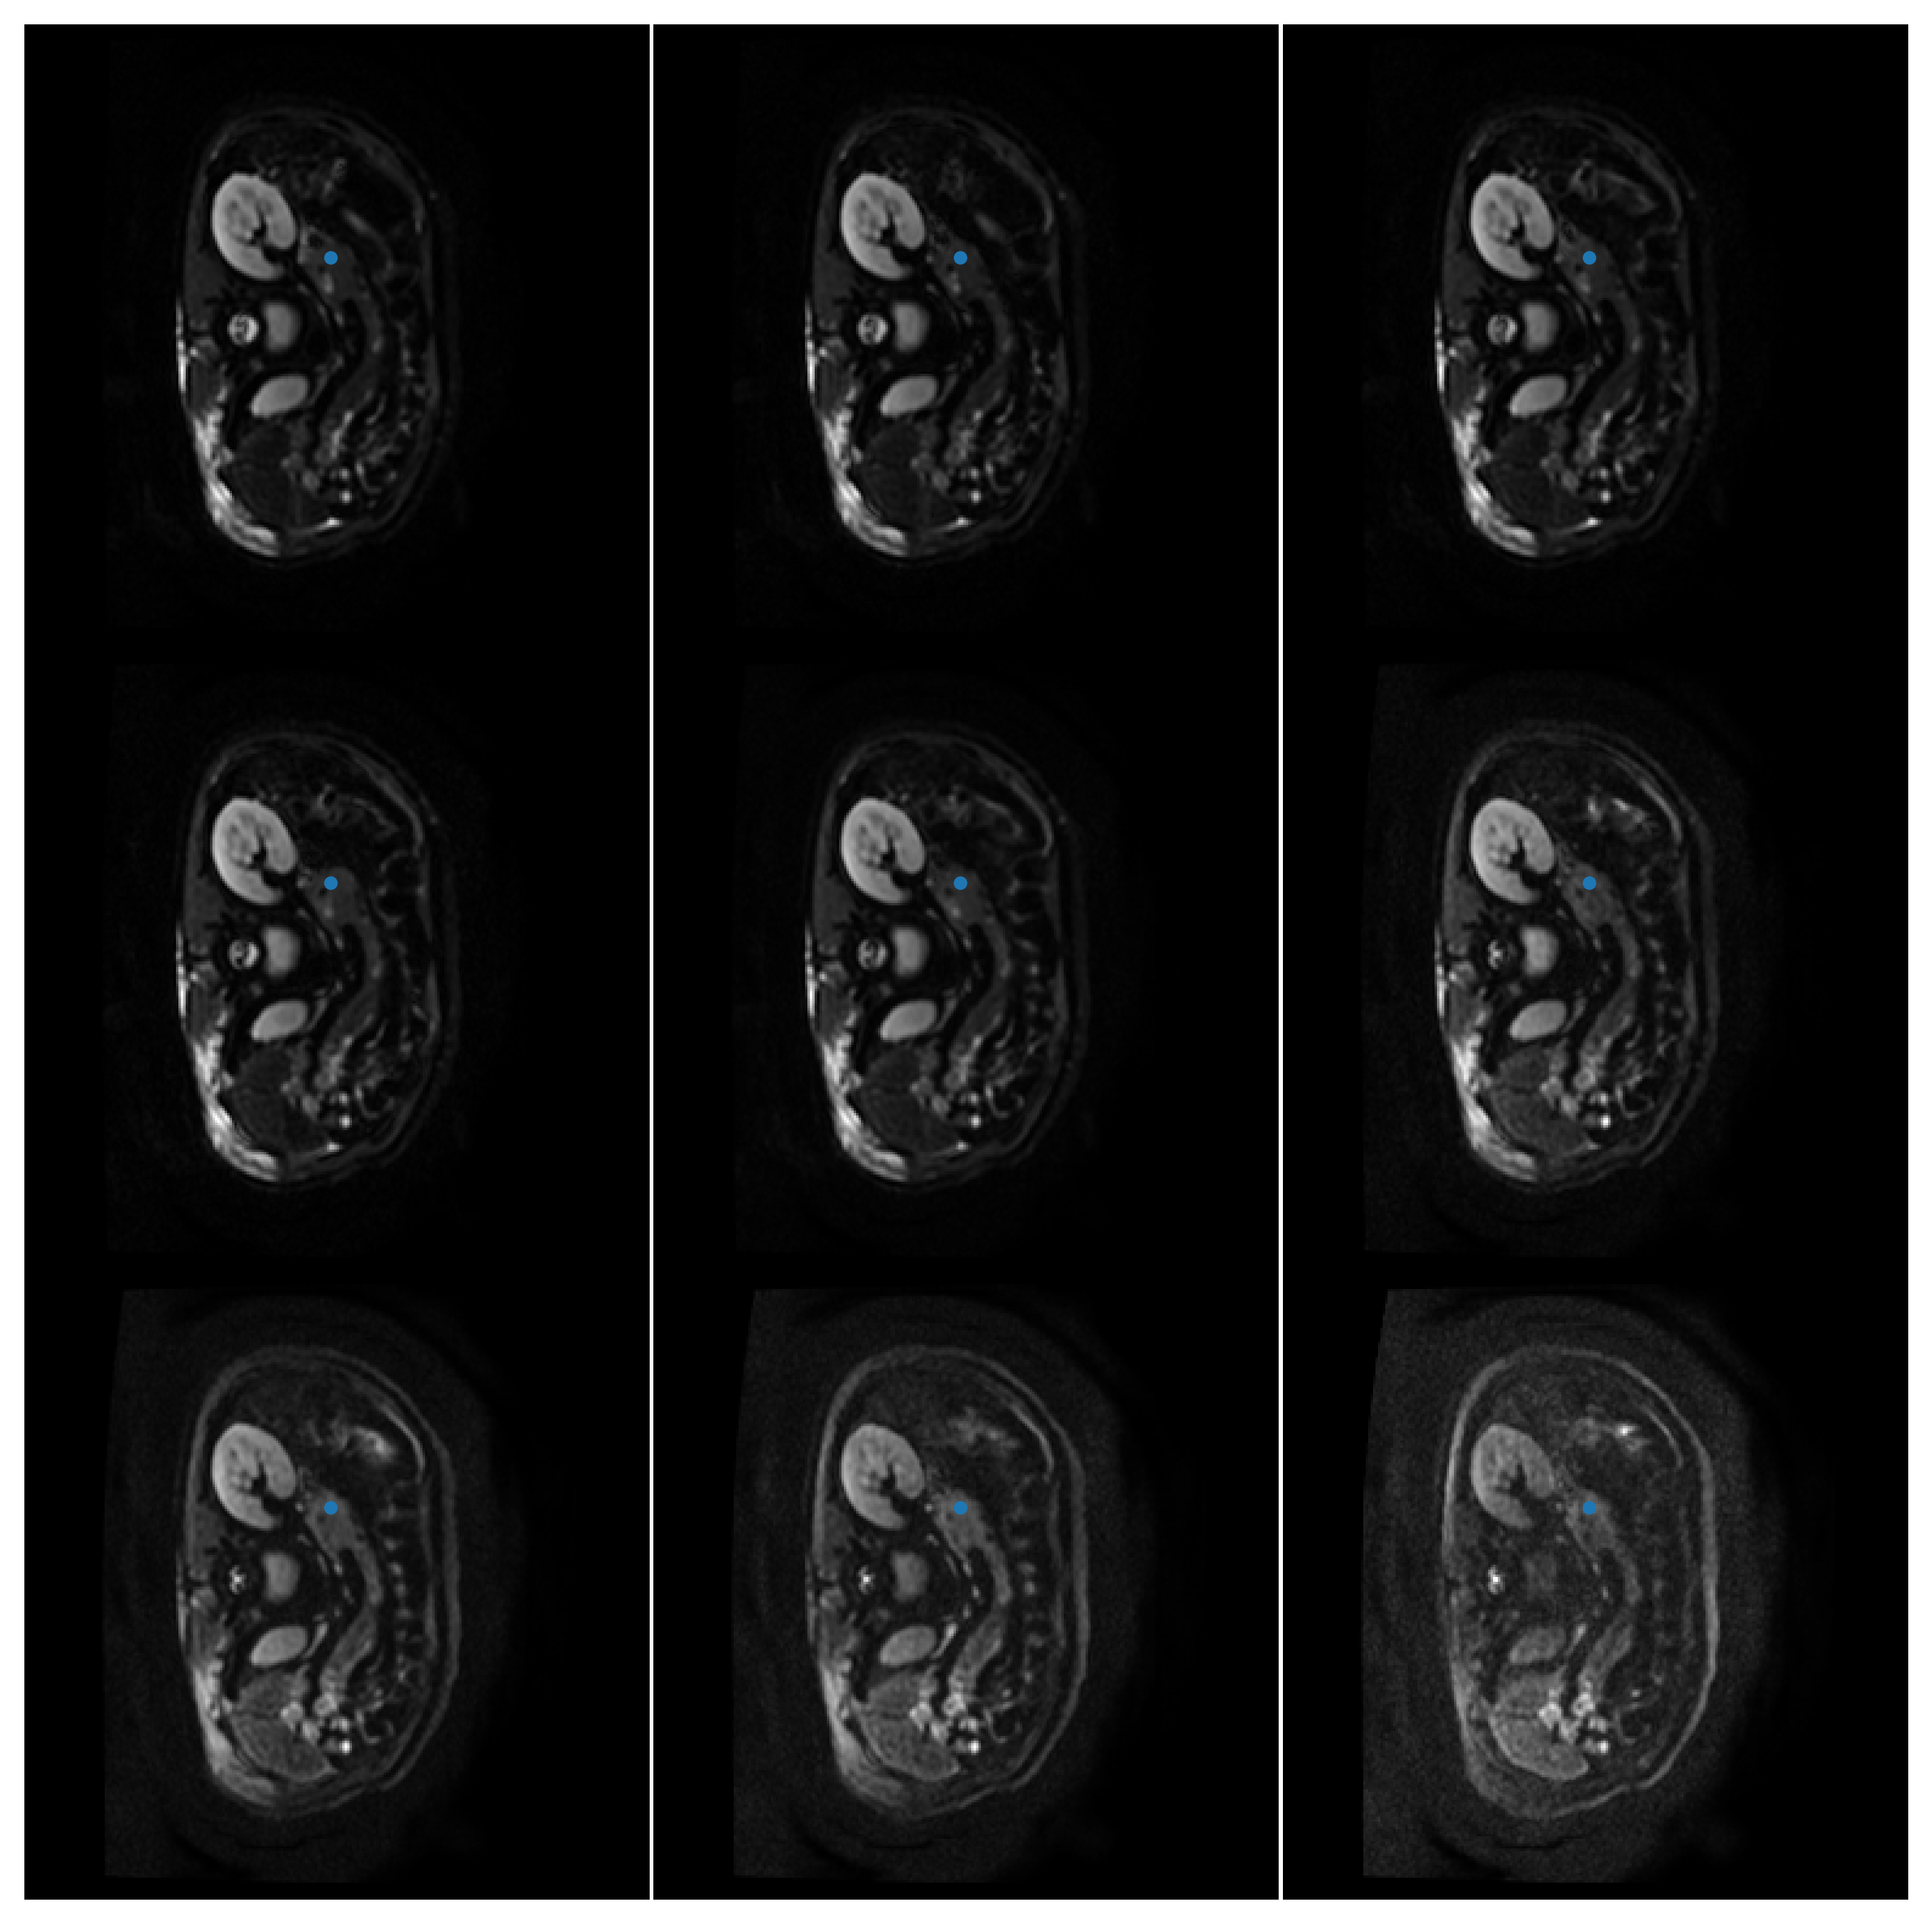

In [46]:
# from matplotlib import colormaps
import matplotlib as mpl

fig, ax = plt.subplots(3, 3, sharex='col', sharey='row', dpi=400, figsize=(10,10))
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)


def plot_img_nii_sub(i_slice, i_bval,x_roi,y_roi, ax):
    ax.axis('off')
    
    ax.imshow(img_get_fdata[:,:,i_slice,i_bval],'gray')
    ax.scatter(x_roi, y_roi, marker='.')
    
    
# x_roi, y_roi = 100, 100
ax = np.ravel(ax)
for i_b in range(num_bval-1):
    plot_img_nii_sub(pancreas_slice, i_b, x_roi, y_roi, ax[i_b])
    plt.savefig('b_9.png')
    
# fig.fig
pancreas_9_b_array = img_get_fdata[:,:,15,:]
pancreas_9_b_array.shape

In [47]:
# help(ax[0].scatter)
# help('matplotlib')

(4000, 4000, 3)

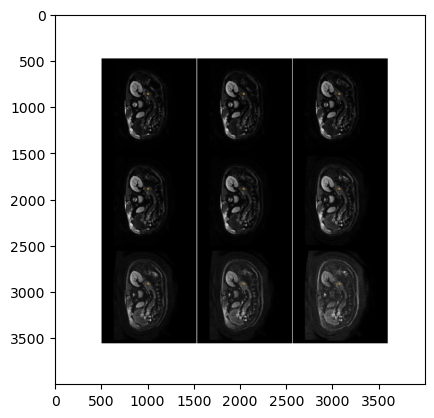

In [48]:
import cv2
b_9_png = cv2.imread('b_9.png')

plt.imshow(b_9_png)
b_9_png.shape


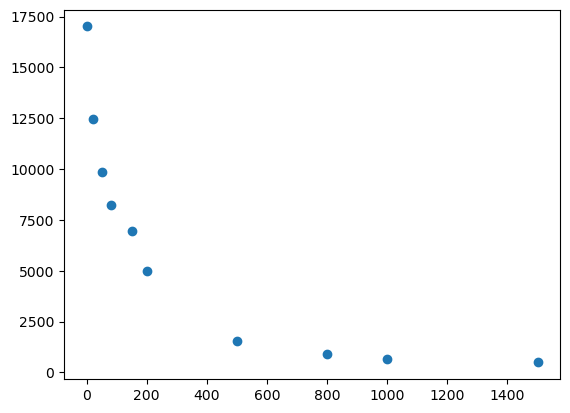

In [50]:
num_bval = img_get_fdata.shape[3]
intensive_of_10b = np.zeros(num_bval)
for i_bval in range(img_get_fdata.shape[3]):
    # print(i_bval)
    intense_roi = np.sum(img_get_fdata[x_roi-5:x_roi+5,y_roi-5:y_roi+5,pancreas_slice,i_bval])/10
    # print(intense_roi.shape)
    intensive_of_10b[i_bval-9] = intense_roi
    
plt.scatter([0, 20, 50, 80, 150, 200, 500, 800, 1000, 1500],intensive_of_10b)

In [42]:
from dipy.reconst.ivim import IvimModel
from dipy.core.gradients import gradient_table
from dipy.data import get_fnames
from dipy.io.gradients import read_bvals_bvecs
from dipy.io.image import load_nifti_data

In [34]:
fraw, fbval, fbvec = get_fnames('ivim')


In [17]:
# data = load_nifti_data(fraw)
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)
# gtab = gradient_table(bvals, bvecs, b0_threshold=0)
# print('data.shape (%d, %d, %d, %d)' % data.shape)

In [18]:
ap_bvals = np.array([20, 50, 80, 150, 200, 500, 800, 1000, 1500, 0])
ap_bvecs = bvecs[0:10,:]
gtab = gradient_table(ap_bvals,ap_bvecs, b0_threshold=0)
print('data.shape (%d, %d, %d, %d)' % img_get_fdata.shape)

data.shape (256, 256, 24, 10)


In [52]:
# TODO: analysis 这里计算时间较长的原因
ivimmodel = IvimModel(gtab, fit_method='trr')

data_slice = img_get_fdata[:,:,pancreas_slice,:]
# data_slice = np.append(img_get_fdata[:,:,-1,:], img_get_fdata[:,:,0:15,:])
ivimfit = ivimmodel.fit(data_slice)

/home/cyang/.conda/envs/pt/lib/python3.10/site-packages/dipy/reconst/ivim.py:153: UserWarning: Bounds for this fit have been set from experiments and literature survey. To change the bounds, please input your bounds in model definition...
  warnings.warn(bounds_warning, UserWarning)
  0%|                                                 | 0/65536 [00:00<?, ?it/s]/home/cyang/.conda/envs/pt/lib/python3.10/site-packages/dipy/reconst/ivim.py:383: RuntimeWarning: divide by zero encountered in log
  -np.log(data[self.gtab.bvals >=
/home/cyang/.conda/envs/pt/lib/python3.10/site-packages/dipy/reconst/ivim.py:378: RuntimeWarning: divide by zero encountered in log
  -np.log(data[self.gtab.bvals <=
/home/cyang/.conda/envs/pt/lib/python3.10/site-packages/dipy/reconst/ivim.py:436: UserWarning: x0 obtained from linear fitting is not feasible as initial guess for leastsq while estimating f and D_star. Using parameters from the linear fit.
  warnings.warn(warningMsg, UserWarning)
/home/cyang/.conda/env

In [53]:
ivimparams = ivimfit.model_params 
print("ivimparams.shape : {}".format(ivimparams.shape))

ivimparams.shape : (256, 256, 4)


In [54]:
i, j = x_roi, y_roi
estimated_params = ivimfit.model_params[i, j, :]
print(estimated_params)

[1.87624218e+03 8.20354473e-01 5.78463598e-03 1.55466837e-03]


In [55]:
def plot_map(raw_data, variable, limits, filename):
    fig, ax = plt.subplots(1)
    lower, upper = limits
    ax.set_title('Map for {}'.format(variable))
    im = ax.imshow(raw_data.T, origin='lower', clim=(lower, upper),
                   cmap="gray", interpolation='nearest')
    fig.colorbar(im)
    fig.savefig(filename)

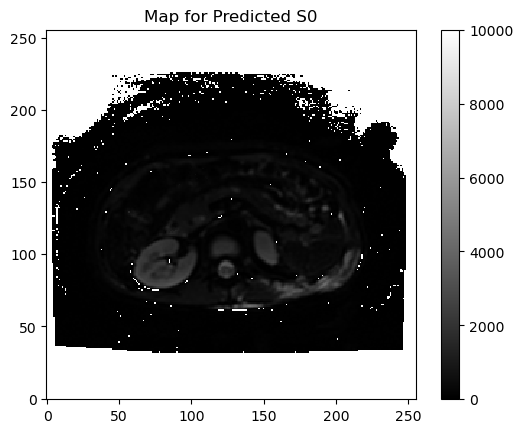

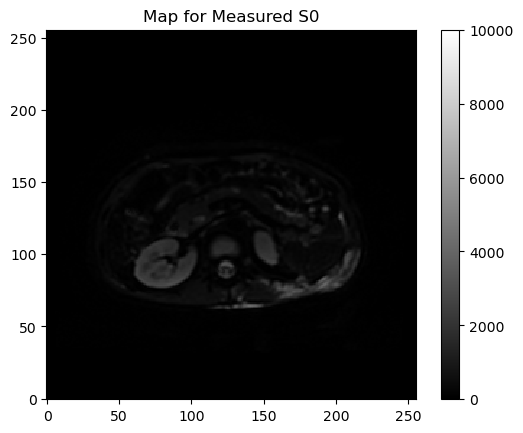

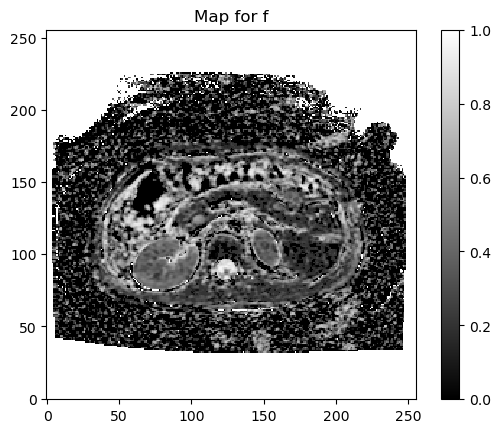

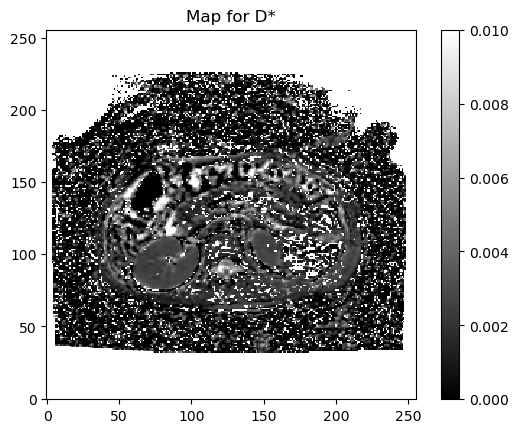

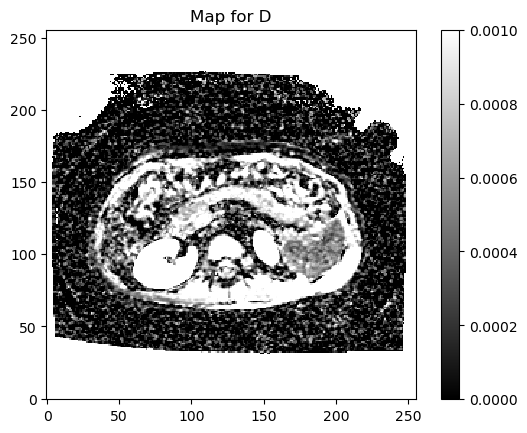

In [56]:
plot_map(ivimfit.S0_predicted, "Predicted S0", (0, 10000), "predicted_S0.png")
plot_map(data_slice[:, :, 0], "Measured S0", (0, 10000), "measured_S0.png")
plot_map(ivimfit.perfusion_fraction, "f", (0, 1), "perfusion_fraction.png")
plot_map(ivimfit.D_star, "D*", (0, 0.01), "perfusion_coeff.png")
plot_map(ivimfit.D, "D", (0, 0.001), "diffusion_coeff.png")

In [24]:
ivimmodel_vp = IvimModel(gtab, fit_method='VarPro', bounds=([0., 0., 0.,0.], [np.inf, 1., 1., 1.]))
ivimmodel_vp = IvimModel(gtab, fit_method='VarPro')
ivimfit_vp = ivimmodel_vp.fit(data_slice)

/home/cyang/.conda/envs/pt/lib/python3.10/site-packages/dipy/reconst/ivim.py:159: UserWarning: Bounds for this fit have been set from experiments and literature survey. To change the bounds, please input your bounds in model definition...
  warnings.warn(bounds_warning, UserWarning)
  0%|                                                 | 0/65536 [00:00<?, ?it/s]/home/cyang/.conda/envs/pt/lib/python3.10/site-packages/dipy/reconst/ivim.py:595: RuntimeWarning: invalid value encountered in divide
  data = data / data_max


ValueError: `x0` is infeasible.

In [ ]:
i, j = 116,186
estimated_params = ivimfit.model_params[i, j, :]
print(estimated_params)

In [ ]:
fig, ax = plt.subplots(1)

ax.scatter(gtab.bvals, data_slice[i, j, :],
           color="green", label="Measured signal")

ivim_trr_predict = ivimfit.predict(gtab)[i, j, :]

ax.plot(np.append(0,gtab.bvals[:-1]), np.append(ivim_trr_predict[-1],ivim_trr_predict[:-1]), label="trr prediction")


S0_est, f_est, D_star_est, D_est = ivimfit.model_params[i, j, :]

text_fit = """trr param estimates: \n S0={:06.3f} f={:06.4f}\n
            D*={:06.5f} D={:06.5f}""".format(S0_est, f_est, D_star_est, D_est)

ax.text(0.65, 0.80, text_fit, horizontalalignment='center',
        verticalalignment='center', transform=plt.gca().transAxes)

ax.set_xlabel("bvalues")
ax.set_ylabel("Signals")


fig.legend(loc='upper right')
fig.savefig("ivim_voxel_plot.png")

In [ ]:
np.append(0,gtab.bvals[:-1])
np.append(ivim_trr_predict[-1],ivim_trr_predict[:-1])

In [ ]:
data_slice = img_get_fdata[75:200,75:175,15,:]
data_slice_order = np.array(data_slice)

num_bval = img_get_fdata.shape[3]
for i_bval in range(img_get_fdata.shape[3]):
    data_slice_order[:,:,i_bval-9] = data_slice[:,:,i_bval]

def plot_img_nii(i_bval,x_roi,y_roi):
    plt.imshow(data_slice_order[:,:,i_bval],'gray')
    plt.colorbar()
    plt.scatter(x_roi, y_roi)
    
    
interactive(plot_img_nii, 
            i_bval = (0,data_slice_order.shape[2]-1),
            x_roi =(0,data_slice_order.shape[1]-1),
            y_roi=(0,data_slice_order.shape[0]-1))

In [ ]:
ap_bvals = np.array([0, 20, 50, 80, 150, 200, 500, 800, 1000, 1500])
ap_bvecs = bvecs[0:10,:]
gtab = gradient_table(ap_bvals,ap_bvecs, b0_threshold=0)
print('data.shape (%d, %d, %d, %d)' % img_get_fdata.shape)

In [ ]:
ivimmodel = IvimModel(gtab, fit_method='trr')
ivimfit = ivimmodel.fit(data_slice_order)

In [ ]:
ivimparams = ivimfit.model_params 
print("ivimparams.shape : {}".format(ivimparams.shape))

In [ ]:
i, j = 112, 42
estimated_params = ivimfit.model_params[i, j, :]
print(estimated_params)

In [ ]:
def plot_map(raw_data, variable, limits, filename):
    fig, ax = plt.subplots(1)
    lower, upper = limits
    ax.set_title('Map for {}'.format(variable))
    im = ax.imshow(raw_data.T, origin='lower', clim=(lower, upper),
                   cmap="gray", interpolation='nearest')
    fig.colorbar(im)
    fig.savefig(filename)

In [ ]:
plot_map(ivimfit.S0_predicted, "Predicted S0", (0, 10000), "predicted_S0.png")
plot_map(data_slice[:, :, 0], "Measured S0", (0, 10000), "measured_S0.png")
plot_map(ivimfit.perfusion_fraction, "f", (0, 1), "perfusion_fraction.png")
plot_map(ivimfit.D_star, "D*", (0, 0.01), "perfusion_coeff.png")
plot_map(ivimfit.D, "D", (0, 0.001), "diffusion_coeff.png")